
# 항공사 지연 요인 분석 보고서
### 25.06.24 오전
### 📦 1. 라이브러리 설치 (처음 한 번만)
- !pip install pandas numpy matplotlib
- (터미널용) pip install pandas numpy matplotlib 


## 1. 프로젝트 개요
- **분석 목적**: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시
- **데이터 출처**: 항공 운항 지연률 데이터 (총 33,468건)
- **분석 대상 변수**:  
  - `pct_carrier_delay`: 운항사 요인
  - `pct_atc_delay`: 관제 요인
  - `pct_weather_delay`: 기상 요인
  - `airline`: 항공사명

### ✅ 분석 관점 요약
- 운항사 & 관제 → 인재 요인

- 기상 → 불가항력 요인

- 따라서 지연율이 낮은 항공사는 내부 운영이 잘되고 있다

- 시각화: 전체 지연의 비율을 Pie Chart로 표현


### 🎯 정책적 시사점 요약
Jet Blue: 관제·운항사 모두 높음 → 인력/시스템 개선 필요

American: 운항사 요인 특히 높음 → 내부 프로세스 재점검 필요

Alaska: 상대적으로 매우 양호 → 우수사례 분석 대상 가능

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows용 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


In [ ]:
# 📂 1. 데이터 불러오기

# CSV 파일 경로에 맞게 수정하세요 (로컬 경로)
file_path = "C:/githome/7week_Airdata_project/data/airline_stats.csv"

# 데이터 로드
df = pd.read_csv(file_path)
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [26]:
# 2. 🧼 데이터 정제 및 구조 확인

df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

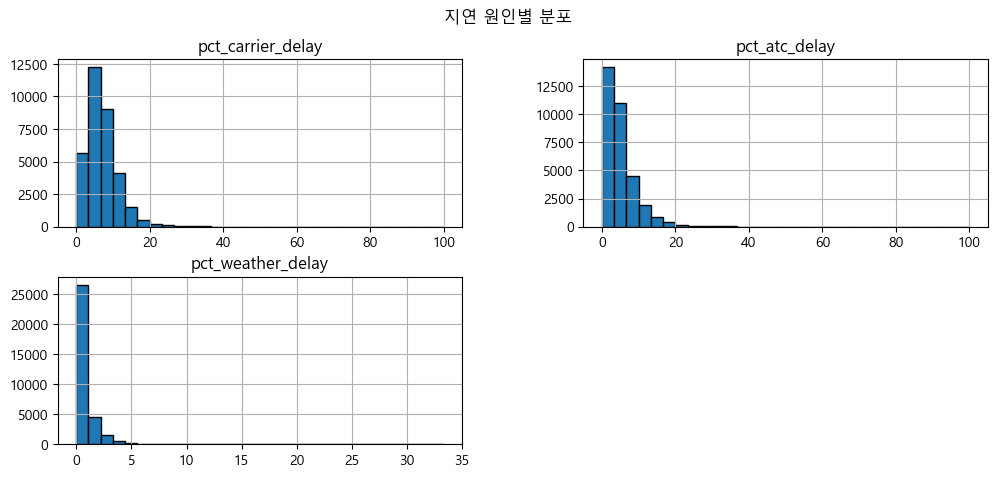

In [27]:
# 3. 📊 변수 분포 확인

import matplotlib.pyplot as plt

df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].hist(
    bins=30, figsize=(12, 5), edgecolor='black'
)
plt.suptitle("지연 원인별 분포")
plt.show()


### ✅ 3-1. 지연 원인별 분포 해석
- 운항사 지연 (pct_carrier_delay)

전체적으로 0~10% 구간에 높은 빈도가 집중되어 있으며,

**일부 극단적인 이상치(최대 100%)**가 존재 → 운항사 내부 관리 문제 가능성

- 관제 지연 (pct_atc_delay)

분포 형태는 운항사 지연과 유사하지만, 조금 더 좁은 범위

이상치는 존재하나 상대적으로 빈도는 적음

- 기상 지연 (pct_weather_delay)

가장 낮은 평균과 좁은 분포

대부분의 데이터가 0~3% 구간에 몰려 있음

이상치는 소수에 불과하며, 분포가 매우 치우쳐 있음

### 🔍 3-1 결론 정리
전체적으로 운항사와 관제 요인이 주요한 지연 원인으로 나타나며,

기상 요인은 분포상 거의 영향력이 미미한 수준

운항사 지연이 가장 넓은 분포와 이상치를 포함하고 있어, 내부 운영의 일관성과 효율성이 주요 변수일 수 있음

In [28]:
# 4. 🔗 상관관계 분석
# 운항사 carrier , 관제요인 atc
df.corr(numeric_only=True)



,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


### 🔍 [#4] 상관관계 분석

| 변수 간 상관               | 계수        | 해석                            |
| --------------------- | --------- | ----------------------------- |
| `carrier` ↔ `atc`     | **0.144** | 약한 양의 상관관계 (인적 지연끼리 조금 연결 있음) |
| `carrier` ↔ `weather` | 0.161     | 독립적이라고 보기 어려움                 |
| `atc` ↔ `weather`     | 0.091     | 사실상 무관                        |


- ✅ 결론: 운항사 지연과 관제 지연은 거의 독립적 → 각각 별개로 관리 필요
- ✅ 기상은 다른 요인과 거의 무관하므로 분석 시 제외해도 영향 없음

In [29]:
# 5. 🏢 항공사별 평균 지연율 비교

df.groupby("airline")[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().round(2)


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.52,5.47,0.51
American,9.04,5.99,1.12
Delta,6.33,4.46,0.68
Jet Blue,8.08,7.35,0.47
Southwest,7.52,3.15,0.51
United,7.40,5.35,0.68


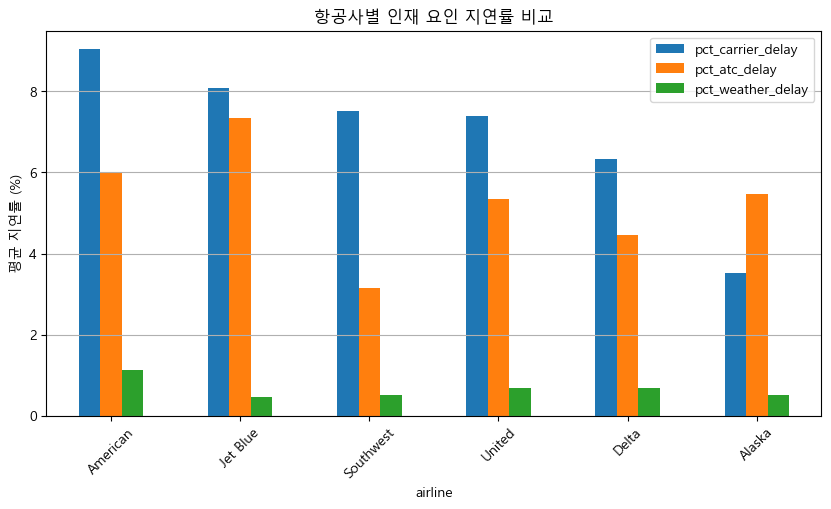

In [30]:
#5 

import matplotlib.pyplot as plt

df_grouped = df.groupby("airline")[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().sort_values('pct_carrier_delay', ascending=False)

df_grouped.plot(kind="bar", figsize=(10, 5))
plt.title("항공사별 인재 요인 지연률 비교")
plt.ylabel("평균 지연률 (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 🔍 [#5 해석 ] 항공사별 평균 지연율 비교
(특히 운항사 요인 + 관제 요인 중심으로)
| Airline      | Carrier (%) | ATC (%) | 합계 (인재 요인)   |
| ------------ | ----------- | ------- | ------------ |
| **American** | 9.04        | 5.99    | **15.03** 🟥 |
| Jet Blue     | 8.08        | 7.35    | **15.43** 🟥 |
| United       | 7.40        | 5.35    | 12.75        |
| Southwest    | 7.52        | 3.15    | 10.67        |
| Delta        | 6.33        | 4.46    | 10.79        |
| **Alaska**   | 3.52        | 5.47    | **8.99** 🟩  |

- ✅ 인재 요인 지연률이 가장 높은 항공사: Jet Blue, American
- ✅ 가장 낮은 항공사: Alaska

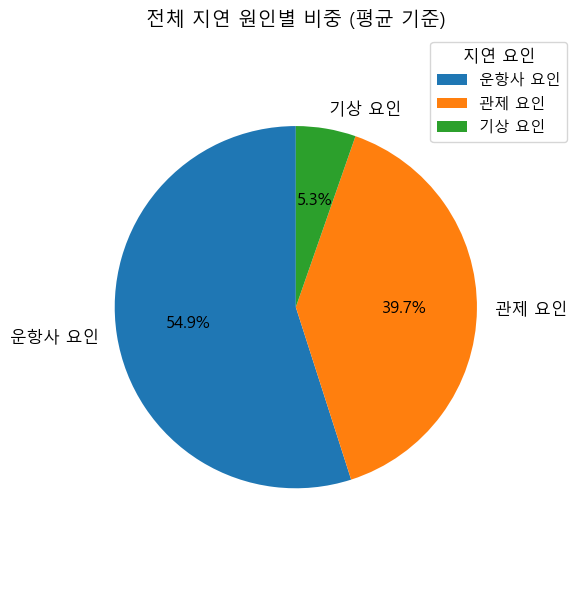

In [40]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 평균 지연율 계산
avg_carrier = df["pct_carrier_delay"].mean()
avg_atc = df["pct_atc_delay"].mean()
avg_weather = df["pct_weather_delay"].mean()

# 데이터 구성
labels = ["운항사 요인", "관제 요인", "기상 요인"]
values = [avg_carrier, avg_atc, avg_weather]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# 파이 차트
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%',
                                   startangle=90, colors=colors, textprops={'fontsize': 12})

# 범례: 오른쪽 위 정렬
plt.legend(wedges, labels, title="지연 요인", loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11, title_fontsize=12)

plt.title("전체 지연 원인별 비중 (평균 기준)", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


# 분석보고서 과정

### 1. 결측치 확인 (Missing Value Check)
### 2. 결측치 처리 (Missing Value Handling) > 방법 설명
### 3. 시각적 분석
### 3-1. 히스토그램
### 3-2. 시각적 분석 해석
### 4. 박스플롯
- 4-1. 전체, 항공사별 분석 
- 4-2. 항공사별 운항사 요인 박스플롯
- 4-3. 분석 결과 
### 5. 추가 분석
- 5-1. 분석결과
### 6. 상관관계 분석
- 6-1. 분석결과(Correlation Analysis)
### 7. 공분산 확인
- 7-1. 분석결과
### 8. 분석 결과 정리
### 9. 추가 : 다음 분석 방향 계획

In [32]:
# ✅ 1. 결측치 확인 (Missing Value Check)

# 전체 결측치 개수 확인
df.isnull().sum()




pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [33]:
# ✅ 2. 결측치 처리 (Missing Value Handling) > 방법 설명

# 결측치 제거 후 새로운 데이터프레임 생성 (dropna())
df_clean = df.dropna()


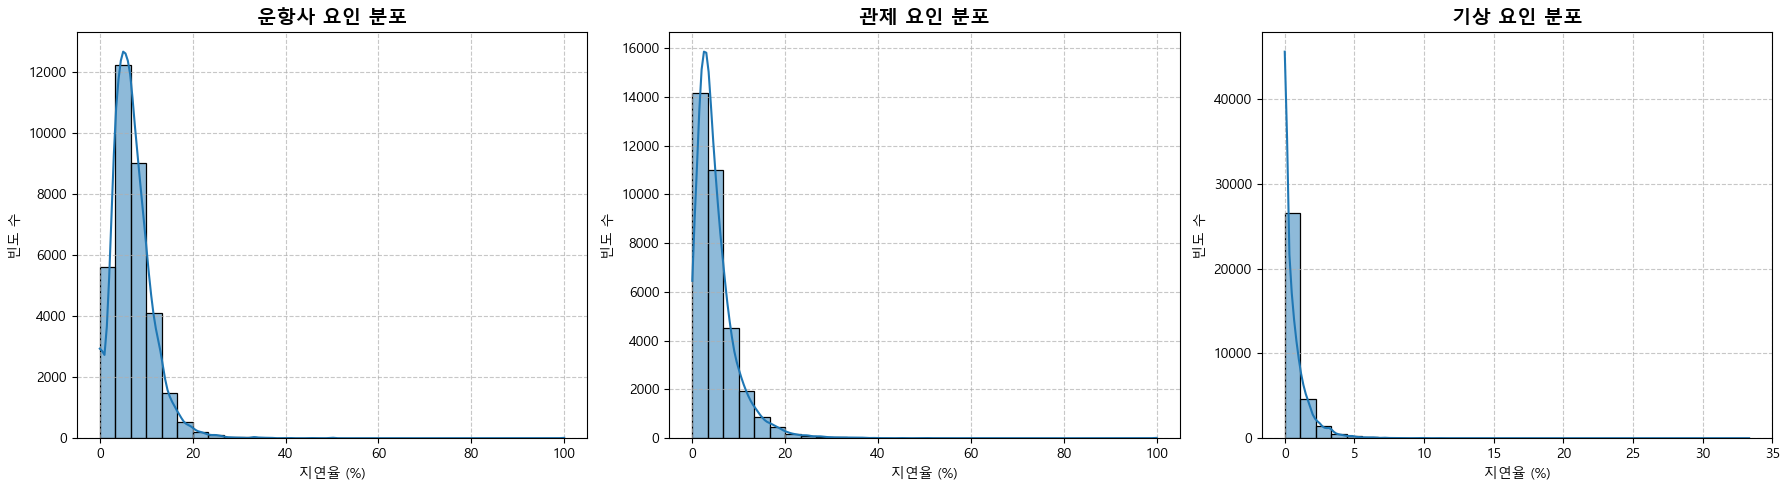

In [ ]:
# 3. 시각적 분석
# 3-1. 히스토그램

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 불러오기 및 결측치 제거
df = pd.read_csv("C:/githome/7week_Airdata_project/data/airline_stats.csv")
df_clean = df.dropna()

# 지연 요인 컬럼 정의
cols = ["pct_carrier_delay", "pct_atc_delay", "pct_weather_delay"]
titles = ["운항사 요인", "관제 요인", "기상 요인"]

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col, title in zip(axes, cols, titles):
    sns.histplot(df_clean[col], kde=True, bins=30, ax=ax)
    ax.set_title(f"{title} 분포", fontsize=14, weight='bold')
    ax.set_xlabel("지연율 (%)")
    ax.set_ylabel("빈도 수")
    ax.grid(True, linestyle='--', alpha=0.7)  # ✅ 그리드 추가

plt.tight_layout()
plt.show()


# 3-2. 시각적 분석 해석

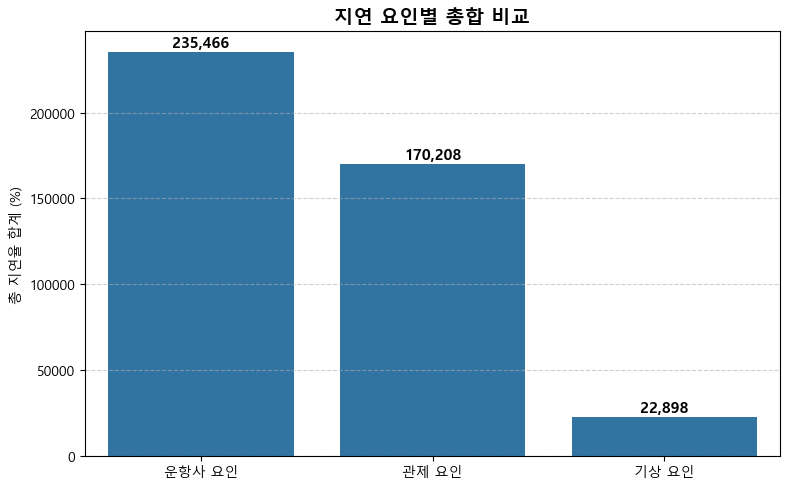

In [35]:
# 합계 계산
sum_by_cause = df_clean[cols].sum().round(2)
labels = ["운항사 요인", "관제 요인", "기상 요인"]

# 시각화
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=labels, y=sum_by_cause.values)

plt.title("지연 요인별 총합 비교", fontsize=14, weight='bold')
plt.ylabel("총 지연율 합계 (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 숫자 라벨 추가 (단위 쉼표 포함)
for bar, value in zip(bars.patches, sum_by_cause.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,
        f"{int(value):,}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


## ✅ 3-3. 히스토그램 해석 (지연 요인별 분포)

### 📊 운항사 요인 (pct_carrier_delay)
지연률은 대부분 0~15% 구간에 분포

일부 **이상치(20% 이상)**도 존재

→ 항공사 내부 운영 정책 또는 정비 체계 차이가 영향을 줄 수 있음

### 🗼 관제 요인 (pct_atc_delay)
전체적으로 10% 이하에 밀집

분포가 좁고 집중적 → 관제 문제는 제한된 구간에서 주로 발생

### 🌧️ 기상 요인 (pct_weather_delay)
거의 대부분 5% 이하의 지연률

→ 기상 요인은 항공 지연의 주요 원인이라 보기 어려움

단, 특정 상황(폭설, 태풍 등)에는 예외 가능성 존재

### 📌 해석

- 운항사/관제/기상 지연 모두 **0~20% 구간에 집중**

운항사와 관제 요인이 기상보다 훨씬 큰 비중

- 운항사 지연 요인이 상대적으로 변동 폭도 크고(횟수 많고), 전체적인 분포가 넓음


→ **인적 요인(운영/관리 차이)**이 항공 지연의 핵심 변수일 가능성 높음

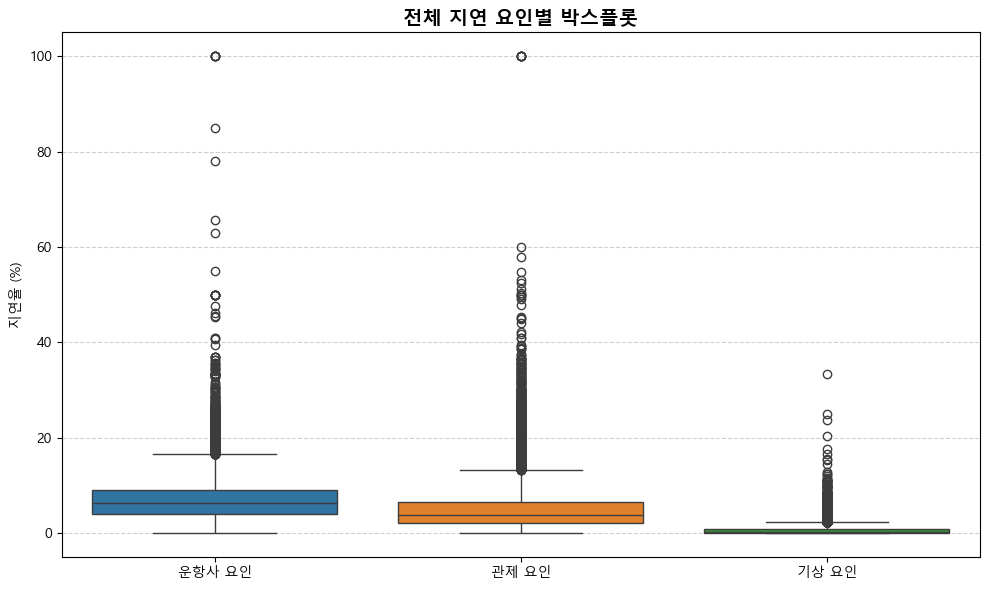

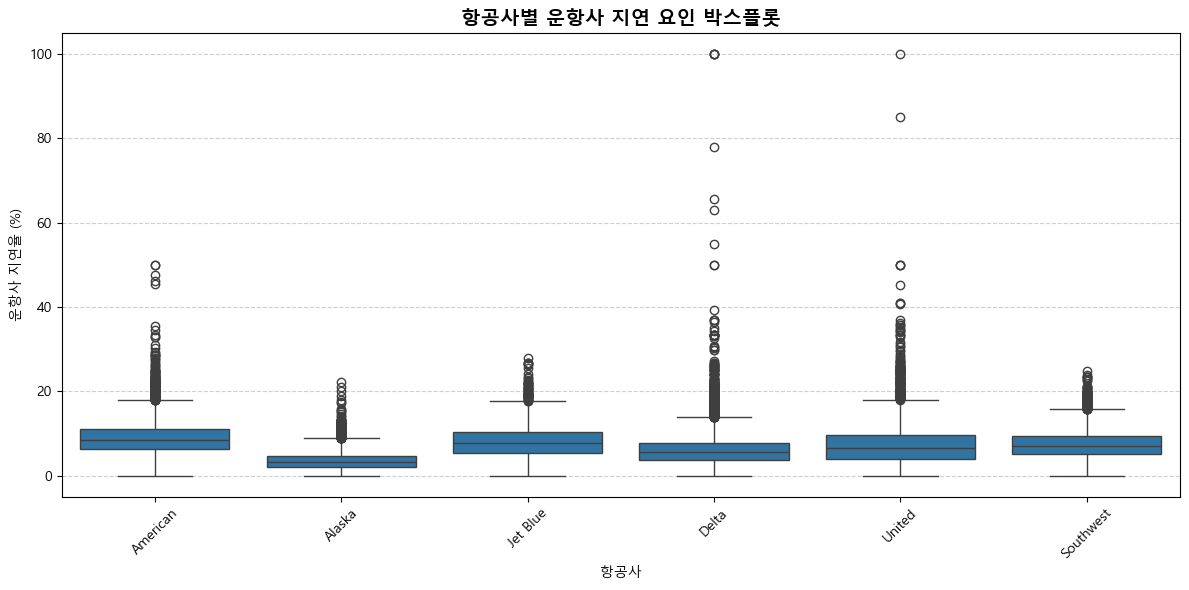

In [ ]:
# 4. 박스플롯
# 4-1. 전체, 항공사별 분석 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 불러오기 및 정제
df = pd.read_csv("C:/githome/7week_Airdata_project/data/airline_stats.csv")
df_clean = df.dropna()

# 4-1. 전체 지연요인 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[["pct_carrier_delay", "pct_atc_delay", "pct_weather_delay"]])
plt.title("전체 지연 요인별 박스플롯", fontsize=14, weight='bold')
plt.ylabel("지연율 (%)")
plt.xticks([0, 1, 2], ["운항사 요인", "관제 요인", "기상 요인"])
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 4-2. 항공사별 운항사 요인 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x="airline", y="pct_carrier_delay")
plt.title("항공사별 운항사 지연 요인 박스플롯", fontsize=14, weight='bold')
plt.xlabel("항공사")
plt.ylabel("운항사 지연율 (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



# 4-3. 분석 결과 


## ✅ 4-3. 분석 결과 해석
전체 지연 요인 박스플롯 분석 결과:

운항사 요인은 중앙값이 상대적으로 높고 이상치도 가장 많이 분포되어 있음.

관제 요인은 중간 정도의 분포와 이상치를 보이며, 일부 구간에서 높은 값이 존재.

기상 요인은 전체적으로 낮은 지연율을 보이며, 극단적인 값(이상치)이 일부 존재.

***👉 요약하면, 운항사와 관제 요인이 전체 지연에 더 큰 영향을 미치며, 기상 요인의 영향은 상대적으로 낮음.***

항공사별 운항사 지연 요인 박스플롯 분석 결과:

***American, United, Delta 항공사는 전반적으로 중앙값이 높고 이상치가 많음.***

반면, ***Alaska, Jet Blue는 지연율이 낮고 박스플롯이 안정적***임.

***👉 특정 항공사는 내부 운영 이슈로 인해 지연의 편차가 크며, 이는 인적 요인에 기인할 수 있음.***

***👉 운영 효율성이 높은 항공사는 지연율이 낮고 안정적인 분포를 보임.***

### 🎯 결론적으로:

운항사 요인의 분산이 크고 이상치가 많다는 점은 
- 항공사 내부 관리 정책, 
- 정비 시스템, 
- 운항 스케줄링 등 

***인적 요인***에 따라 지연 편차가 발생하고 있음을 시사합니다.

이러한 분석은 운항사별 운영 개선의 필요성을 보여주며, 지연률을 낮추기 위한 인프라 투자와 관리 체계 점검이 중요하다는 통찰을 제공합니다.

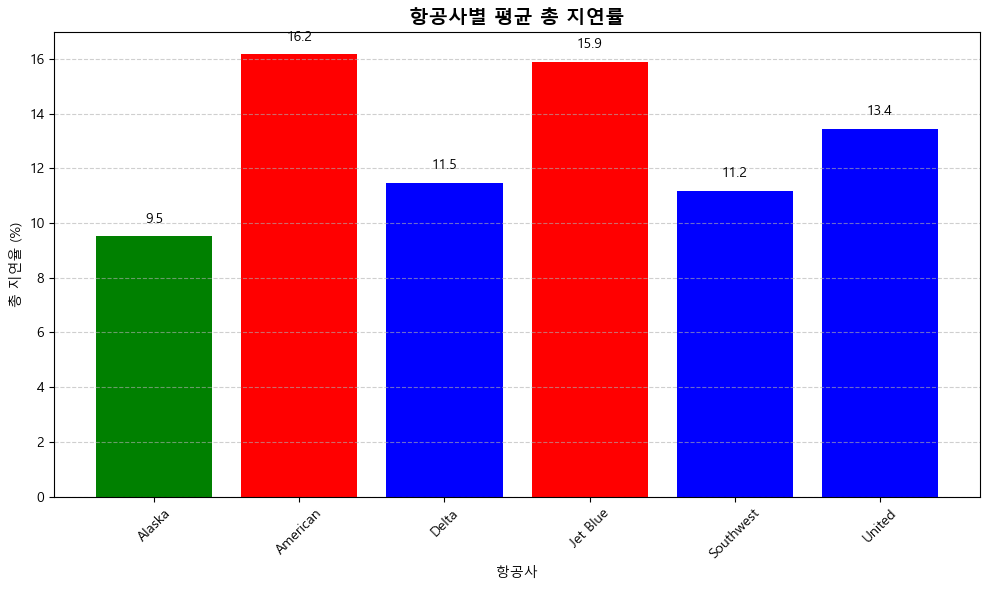

In [41]:
# 총 지연율 컬럼 추가
df_clean["total_delay"] = (
    df_clean["pct_carrier_delay"]
    + df_clean["pct_atc_delay"]
    + df_clean["pct_weather_delay"]
)

# 항공사별 평균 총 지연률 계산
mean_delay_by_airline = df_clean.groupby("airline")["total_delay"].mean().round(2)

# 색상 지정
colors = []
for delay in mean_delay_by_airline:
    if delay >= 14:
        colors.append("red")
    elif delay >= 10:
        colors.append("blue")
    else:
        colors.append("green")

# 시각화 (Matplotlib 방식)
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_delay_by_airline.index, mean_delay_by_airline.values, color=colors)

# 평균값 표시
for bar, value in zip(bars, mean_delay_by_airline.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{value:.1f}", ha="center", fontsize=10)

plt.title("항공사별 평균 총 지연률", fontsize=14, weight="bold")
plt.xlabel("항공사")
plt.ylabel("총 지연율 (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 5-1. 분석결과

## ✅ 5-1. 분석 결과 해석 (보완 및 강조)
항공사별로 총 지연률을 비교한 결과, American, United, Jet Blue는 평균 지연률이 높은 편이며,
Alaska, Delta, Southwest는 상대적으로 낮은 지연률을 보였습니다.

특히 운항사 요인이 높은 항공사들이 총 지연률도 함께 높은 경향을 보여,
운항사 내부 운영/관리 체계가 항공 지연에 큰 영향을 미침을 알 수 있습니다.

기상 요인은 전체 지연에서 차지하는 비중도 낮고, 항공사 간 차이에도 큰 영향을 주지 않았습니다.

### 📌 핵심 통찰

인적/운영 요인이 전체 지연의 주된 원인임이 명확히 드러남

지연률이 낮은 항공사는 내부 프로세스나 대응 체계가 우수할 가능성

### 🔍 흥미로운 발견

Jet Blue는 박스플롯 기준으로는 지연율이 낮은 항공사로 보였으나,
실제 총 지연률을 평균으로 비교한 결과 상위권에 위치했습니다.

✅ 이는 ***평균과 분포, 이상치 간의 차이를 보여주는 좋은 예시***이며,

단일 지표로 판단하지 않고 다양한 분석 시각을 병행해야 하는 중요성을 시사합니다.

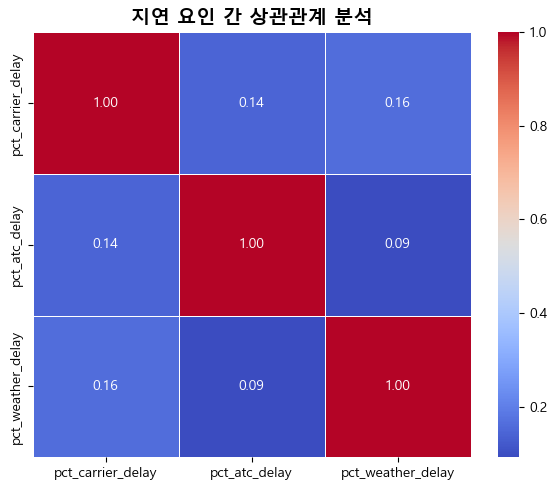

In [38]:
# ✅ 6. 상관관계 분석 (Correlation Analysis)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 및 정제
df = pd.read_csv("C:/githome/7week_Airdata_project/data/airline_stats.csv")
df_clean = df.dropna().copy()

# 상관계수 계산 (피어슨 방식)
corr = df_clean[["pct_carrier_delay", "pct_atc_delay", "pct_weather_delay"]].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("지연 요인 간 상관관계 분석", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()




# 6-1. 분석결과

### ✅ 6-1. 상관관계 분석 결과 해석
전체적으로 각 지연 요인 간의 상관관계는 매우 낮음:

운항사 vs 관제 지연: r ≈ 0.14

운항사 vs 기상 지연: r ≈ 0.16

관제 vs 기상 지연: r ≈ 0.09

📌 이는 각 지연 요인이 서로 독립적인 원인으로 작용하고 있다는 뜻입니다.

🔎 해석 요약
운항사, 관제, 기상 각각의 지연 사유는 서로 크게 영향을 주지 않음.

복합적인 원인보다는 독립적인 단일 요인이 주된 지연 요인으로 작용 가능.

향후 예측 모델 구성 시, 다중 공선성 문제는 낮을 것으로 기대됨.

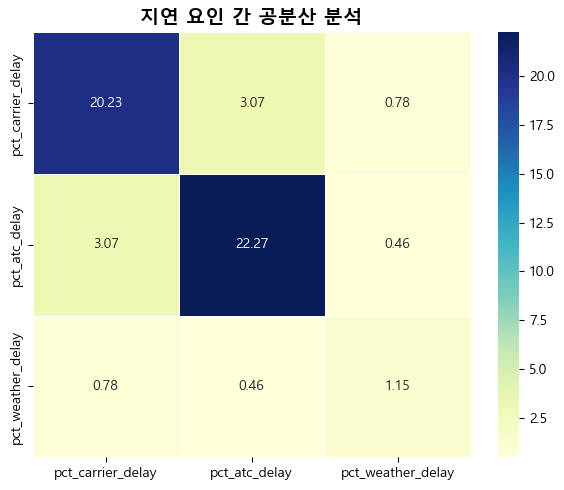

In [39]:
# 7. 공분산 확인

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 및 정제
df = pd.read_csv("C:/githome/7week_Airdata_project/data/airline_stats.csv")
df_clean = df.dropna().copy()

# 공분산 행렬 계산
cov_matrix = df_clean[["pct_carrier_delay", "pct_atc_delay", "pct_weather_delay"]].cov()

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cov_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("지연 요인 간 공분산 분석", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# 7-1. 분석결과

## ✅ 7-1. 분석 결과 해석
공분산 값은 모두 양수이며, 서로 같은 방향으로 증감하는 경향은 있으나, 그 정도는 미미함.

특히:
| 항목           | 공분산 값    |
| ------------ | -------- |
| 운항사 vs 관제 요인 | **3.07** |
| 운항사 vs 기상 요인 | **0.78** |
| 관제 vs 기상 요인  | **0.46** |

(Diagonal 값은 각각의 분산: 운항사 20.23, 관제 22.27, 기상 1.15)
- pct_weather_delay의 자기 공분산(=분산)이 1.15인 이유는 기상 요인의 지연율 자체가 전체적으로 매우 작고, 변동도 작기 때문입니다.



### 🔍 해석 요약
모든 공분산 값이 양수 → 각 요인이 동시에 증감하는 경향은 있으나, 수치는 작아 강한 상관은 아님.

관제 ↔ 운항사 공분산이 가장 큼 (3.07) → 두 인적 요인 간에는 일부 연계된 운영 흐름 가능성.

기상 요인과의 공분산은 매우 낮음 (0.46~0.78) → 날씨 지연은 다른 요인과 독립적.

📌 따라서:

인위적 요인(운항사·관제)이 지연율 변화에 더 큰 영향력을 가지며, 기상 요인은 상대적으로 분리된 독립 변수


# ✅ 8. 분석 결과 정리

- 전체 지연 원인 분석 결과, **운항사와 관제 요인이 기상 요인보다 훨씬 큰 비중**을 차지함.

- 세 요인의 지연율 분포는 대부분 **0~20% 구간에 집중**되어 있으며,  
  특히 **운항사 요인은 평균도 높고, 변동 폭도 크고 이상치도 많음** → 인적 요인의 중요성 강조됨.

- 항공사별 박스플롯 분석 결과, **Jet Blue, United, American** 등은  
  **운항사 지연율 평균이 높고, 이상치도 많음** → 내부 운영/관리 문제 가능성 존재.

- 상관관계 분석에서는 요인 간 **약한 양의 상관관계** 존재하지만,  
  그 수치(0.1~0.16)는 약하여 **독립적인 지연 원인**으로 해석 가능.

- 공분산 분석에서도 **기상 요인은 낮은 변동성과 낮은 연계성**을 보여  
  **기상은 독립 변수**로 작용하는 경향이 강함.

- 총 지연률 기준으로 볼 때, **Jet Blue가 상대적으로 높은 지연률을 보이는 것**은  
  운항사 요인이 적은 편이라는 박스플롯 분석과 상반됨 → **데이터의 새로운 해석 포인트**로 주목할 만함.

### 📌 종합하면,  

- **운항사 및 관제 요인**은 항공 지연에 있어 **핵심적 인적 변수**
- 전체 지연 요인 중 **운항사 요인과 관제 요인**이 **기상 요인보다 훨씬 큰 비중**을 차지함.
- 특히 항공사별로 운항사/관제사 관리의 차이에 따라 **지연률의 편차가 발생**하는 경향이 보임.
- 이는 **인재(人災) 중심의 개선 여지**가 있다는 중요한 시사점을 제공함.


# ✅ 9. 추가: 다음 분석 방향 계획

1. **시간대별 분석 강화**
   - 항공 지연은 **시간대(오전/오후/야간)**에 따라 차이가 날 수 있음
   - 동일 항공사라도 **운항 시간에 따라 운영 효율이 달라질 가능성** 고려 필요

2. **출발지/도착지 지역 요인 분석**
   - 특정 지역 공항(예: 뉴욕 JFK, 시카고 O'Hare 등)이 **지연에 더 취약**할 수 있음
   - **지연 집중 공항 파악 → 운영 개선 포인트 도출**

3. **기상 데이터 연계 분석**
   - 외부 기상 API와 연동하여 **실제 기상 조건(강수량, 풍속 등)**과 비교
   - 기상 요인이 독립적이라는 분석을 **데이터로 검증**

4. **기간별 추세 파악**
   - 월별/분기별 **지연률 추세 분석**을 통해 특정 시기 패턴 식별
   - 연말/휴가철 등 **계절성 요인 고려한 시계열 분석** 제안

5. **항공사 운영 지표와 결합 분석**
   - 고객 불만 건수, 정비 횟수, 운항 횟수 등과의 **교차 분석**으로 더 정교한 원인 규명 가능


